In [76]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
import matplotlib.pyplot as plt

from data_loading import *

pd.options.mode.copy_on_write = True

In [ ]:
raw_df = pd.read_pickle('./data/processed/tse_stocks.pkl')
raw_df

目前狀態  上市別    開盤價(元)    最高價(元)    最低價(元)    收盤價(元)  \
證券代碼     Date                                                                
1101 台泥  2000-02-14  Current   TSE    9.7645    9.7645    9.3075    9.4529   
         2000-02-15  Current   TSE    9.5152    9.8892    9.5152    9.7853   
         2000-02-16  Current   TSE   10.1177   10.3878    9.9723   10.3878   
         2000-02-17  Current   TSE   10.6994   11.1149   10.6994   11.1149   
         2000-02-18  Current   TSE   11.4266   11.5304   10.3878   10.5955   
...                       ...  ...       ...       ...       ...       ...   
9958 世紀鋼 2025-02-06  Current   TSE  161.5000  163.5000  160.5000  163.0000   
         2025-02-07  Current   TSE  163.5000  163.5000  161.0000  162.0000   
         2025-02-10  Current   TSE  161.0000  167.0000  161.0000  163.0000   
         2025-02-11  Current   TSE  165.0000  169.5000  165.0000  166.5000   
         2025-02-12  Current   TSE  167.5000  170.0000  163.5000  163.5000   

                     成交量(千股)    成交值(千元)    週轉率％   市值(百萬元)  ...  是否可信用交易(Y)  \
證券代碼     Date                                              ...               
1101 台泥  2000-02-14  36751.0  1694100.0  1.6732   99941.0  ...           Y   
         2000-02-15  38119.0  1788124.0  1.7354  103455.0  ...           Y   
         2000-02-16  41592.0  2052362.0  1.8936  109825.0  ...           Y   
         2000-02-17  26184.0  1386896.0  1.1921  117513.0  ...           Y   
         2000-02-18  69982.0  3662111.0  3.1861  112022.0  ...           Y   
...                      ...        ...     ...       ...  ...         ...   
9958 世紀鋼 2025-02-06    913.0   148334.0  0.3554   41874.0  ...           Y   
         2025-02-07    742.0   120351.0  0.2888   41617.0  ...           Y   
         2025-02-10   1847.0   303848.0  0.7190   41874.0  ...           Y   
         2025-02-11   2922.0   489263.0  1.1374   42773.0  ...           Y   
         2025-02-12   1885.0   313895.0  0.7338   42003.0  ...           Y   

                      借券賣出限額    每股融資成本    每股融券成本  融券最後回補日  融資暫停交易起日  融券暫停交易起日  \
證券代碼     Date                                                                   
1101 台泥  2000-02-14      NaN   41.4900   42.3700      NaN       NaN       NaN   
         2000-02-15      NaN   42.1800   42.9000      NaN       NaN       NaN   
         2000-02-16      NaN   43.0500   43.9800      NaN       NaN       NaN   
         2000-02-17      NaN   43.7100   45.0000      NaN       NaN       NaN   
         2000-02-18      NaN   45.5800   45.4600      NaN       NaN       NaN   
...                      ...       ...       ...      ...       ...       ...   
9958 世紀鋼 2025-02-06  25690.0  203.4933  155.1586      NaN       NaN       NaN   
         2025-02-07  25690.0  203.3936  155.2251      NaN       NaN       NaN   
         2025-02-10  25690.0  203.0763  155.5991      NaN       NaN       NaN   
         2025-02-11  25690.0  202.6671  155.9060      NaN       NaN       NaN   
         2025-02-12  25690.0  202.3575  156.0088      NaN       NaN       NaN   

                     資券暫停交易迄日 恢復交易日 暫停交易原因  
證券代碼     Date                               
1101 台泥  2000-02-14       NaN   NaN    NaN  
         2000-02-15       NaN   NaN    NaN  
         2000-02-16       NaN   NaN    NaN  
         2000-02-17       NaN   NaN    NaN  
         2000-02-18       NaN   NaN    NaN  
...                       ...   ...    ...  
9958 世紀鋼 2025-02-06       NaN   NaN    NaN  
         2025-02-07       NaN   NaN    NaN  
         2025-02-10       NaN   NaN    NaN  
         2025-02-11       NaN   NaN    NaN  
         2025-02-12       NaN   NaN    NaN  

[4726311 rows x 34 columns]

In [207]:
df = raw_df[['收盤價(元)', '成交值(千元)', '週轉率％', '市值(百萬元)']]
df.index.rename(['證券代碼', 'Date'], inplace=True)
df.rename(columns={'收盤價(元)': 'Close', '週轉率％': 'Turnover'}, inplace=True)
df

Close    成交值(千元)  Turnover   市值(百萬元)
證券代碼     Date                                               
1101 台泥  2000-02-14    9.4529  1694100.0    1.6732   99941.0
         2000-02-15    9.7853  1788124.0    1.7354  103455.0
         2000-02-16   10.3878  2052362.0    1.8936  109825.0
         2000-02-17   11.1149  1386896.0    1.1921  117513.0
         2000-02-18   10.5955  3662111.0    3.1861  112022.0
...                       ...        ...       ...       ...
9958 世紀鋼 2025-02-06  163.0000   148334.0    0.3554   41874.0
         2025-02-07  162.0000   120351.0    0.2888   41617.0
         2025-02-10  163.0000   303848.0    0.7190   41874.0
         2025-02-11  166.5000   489263.0    1.1374   42773.0
         2025-02-12  163.5000   313895.0    0.7338   42003.0

[4726311 rows x 4 columns]

In [208]:
df[df.isna().any(axis=1)]
df.dropna(inplace=True)
df[df.isna().any(axis=1)]

,,Close,成交值(千元),Turnover,市值(百萬元)
證券代碼,Date,,,,


In [209]:
twii = pd.read_pickle('./data/processed/tse_index.pkl')

twii = twii[['收盤價(元)', '成交值(千元)', '週轉率％', '市值(百萬元)']]
twii.rename(columns={'收盤價(元)': 'Close', '週轉率％': 'Turnover'}, inplace=True)
twii

Close      成交值(千元)  Turnover     市值(百萬元)
證券代碼       Date                                                   
Y9999 加權指數 2000-02-14   9971.45  204705000.0    1.5287  14273629.0
           2000-02-15   9957.74  159764000.0    1.2774  14253988.0
           2000-02-16  10064.49  182188000.0    1.3596  14408615.0
           2000-02-17  10202.20  241193000.0    1.8034  14606238.0
           2000-02-18  10096.38  259771000.0    2.0189  14456741.0
...                         ...          ...       ...         ...
           2025-02-07  23478.27  362285982.0    0.3475  75236064.0
           2025-02-08       NaN          NaN       NaN         NaN
           2025-02-10  23252.14  334793847.0    0.3518  74512302.0
           2025-02-11  23384.05  355049928.0    0.3859  74935162.0
           2025-02-12  23289.75  378582968.0    0.4101  74637955.0

[6599 rows x 4 columns]

In [108]:
twii[twii.isna().any(axis=1)]
twii.dropna(inplace=True)
twii[twii.isna().any(axis=1)]

,,Close,成交值(千元),週轉率％,市值(百萬元)
證券代碼,Date,,,,


In [109]:
df = pd.concat([df, twii])
#df = df[df.index.get_level_values(1) >= '2012-01-01']

In [110]:
df

Close      成交值(千元)    週轉率％     市值(百萬元)
證券代碼       Date                                                   
1101 台泥    2000-02-14      9.4529    1694100.0  1.6732     99941.0
           2000-02-15      9.7853    1788124.0  1.7354    103455.0
           2000-02-16     10.3878    2052362.0  1.8936    109825.0
           2000-02-17     11.1149    1386896.0  1.1921    117513.0
           2000-02-18     10.5955    3662111.0  3.1861    112022.0
...                           ...          ...     ...         ...
Y9999 加權指數 2025-02-06  23316.6000  341201513.0  0.3119  74718401.0
           2025-02-07  23478.2700  362285982.0  0.3475  75236064.0
           2025-02-10  23252.1400  334793847.0  0.3518  74512302.0
           2025-02-11  23384.0500  355049928.0  0.3859  74935162.0
           2025-02-12  23289.7500  378582968.0  0.4101  74637955.0

[4732401 rows x 4 columns]

In [111]:
# Apply the function to each group
df['YSTD Close'] = df.groupby('證券代碼')['Close'].shift(1)
df['logRet_1d'] = (df['Close'] / df['YSTD Close']).apply(np.log)
df['logRet_3d'] = df.groupby('證券代碼')['logRet_1d'].rolling(3).sum().reset_index(0,drop=True)
df['vol_120d'] = df.groupby('證券代碼')['logRet_1d'].rolling(120).std().reset_index(0,drop=True)

In [112]:
#df[df.index.get_level_values(level=0) == 'TWII'][df['logRet_3d'].isnull()]

In [113]:
# calculate 750-day rolling correlation

unstacked = df['logRet_3d'].unstack(0)
unstacked = unstacked[~unstacked['Y9999 加權指數'].isnull()]

corr = unstacked.rolling(750).corr(unstacked['Y9999 加權指數'])

df['corr_750d'] = corr.stack().reorder_levels([1, 0]).sort_index()

In [114]:
df[df['corr_750d'].isnull()]

Close      成交值(千元)    週轉率％     市值(百萬元)  YSTD Close  \
證券代碼       Date                                                                 
1101 台泥    2000-02-14     9.4529    1694100.0  1.6732     99941.0         NaN   
           2000-02-15     9.7853    1788124.0  1.7354    103455.0      9.4529   
           2000-02-16    10.3878    2052362.0  1.8936    109825.0      9.7853   
           2000-02-17    11.1149    1386896.0  1.1921    117513.0     10.3878   
           2000-02-18    10.5955    3662111.0  3.1861    112022.0     11.1149   
...                          ...          ...     ...         ...         ...   
Y9999 加權指數 2003-01-16  4943.2900  138216000.0  1.7072  10024194.0   5017.7000   
           2003-01-17  4907.7800   99416000.0  1.2934   9952342.0   4943.2900   
           2003-01-20  4951.0300   85216000.0  1.0420  10039654.0   4907.7800   
           2003-01-21  4945.8700  124550000.0  1.4784  10029180.0   4951.0300   
           2003-01-22  4993.2700  108301000.0  1.3376  10124482.0   4945.8700   

                       logRet_1d  logRet_3d  vol_120d  corr_750d  
證券代碼       Date                                                   
1101 台泥    2000-02-14        NaN        NaN       NaN        NaN  
           2000-02-15   0.034560        NaN       NaN        NaN  
           2000-02-16   0.059751        NaN       NaN        NaN  
           2000-02-17   0.067655   0.161965       NaN        NaN  
           2000-02-18  -0.047857   0.079548       NaN        NaN  
...                          ...        ...       ...        ...  
Y9999 加權指數 2003-01-16  -0.014941  -0.009657  0.017948        NaN  
           2003-01-17  -0.007209  -0.017099  0.017752        NaN  
           2003-01-20   0.008774  -0.013376  0.017731        NaN  
           2003-01-21  -0.001043   0.000522  0.017726        NaN  
           2003-01-22   0.009538   0.017269  0.017747        NaN  

[759396 rows x 9 columns]

In [115]:
beta =  df[df.index.get_level_values('證券代碼') == '1101 台泥']['corr_750d']
beta.fillna(0)[beta.fillna(0) != 0]

證券代碼     Date      
1101 台泥  2003-01-23    0.644650
         2003-01-24    0.645958
         2003-01-27    0.645663
         2003-01-28    0.645871
         2003-02-06    0.645493
                         ...   
         2025-02-06    0.432284
         2025-02-07    0.431294
         2025-02-10    0.431043
         2025-02-11    0.430909
         2025-02-12    0.429756
Name: corr_750d, Length: 5430, dtype: float64

In [116]:
# calculate beta

vol_unstacked = df['vol_120d'].unstack('證券代碼')
beta = vol_unstacked.div(vol_unstacked['Y9999 加權指數'], axis=0) * corr
df['beta'] = beta.stack().reorder_levels([1, 0]).sort_index()
df['beta_lag1'] = df.groupby('證券代碼')['beta'].shift(1)
df['beta_lag2'] = df.groupby('證券代碼')['beta'].shift(2)

In [ ]:
# function for sorting quantiles

def test_factor_performance(df, q = 10, factor = 'beta_last_month', returns = 'logRet_1d', reverse = False):

    df['Rank'] = df.groupby('Date')[factor].rank(ascending=reverse)
    df['Quantile'] = df.groupby('Date')['Rank'].transform(
        lambda x: pd.qcut(x, q, labels=[i for i in range(1, q+1)])
    )

    # Calculate average return for each quantile on each date
    quantile_returns = df.groupby(['Date', 'Quantile'])[returns].mean().unstack()
    #quantile_returns['avg'] = df.groupby('Date')[returns].mean()
    #quantile_returns['long-short'] = quantile_returns[1] - quantile_returns[q]
    #plt.title('Daily Beta Performance')
    quantile_returns.cumsum().plot()

    df['Weight'] = 1 / df.groupby(['Date', 'Quantile']).transform('size')

    position = pd.DataFrame()

    for i in range(1, q+1):
        position[i] = df['Weight'].where(df['Quantile'] == i, other=0)
    
    qs.reports.metrics(quantile_returns)
    return quantile_returns, position

In [194]:
# quantile with daily rebalance

stocks = df[df.index.get_level_values('證券代碼') != 'Y9999 加權指數'].dropna(how='any')
stocks

Close    成交值(千元)    週轉率％  市值(百萬元)  YSTD Close  \
證券代碼     Date                                                           
1101 台泥  2003-01-27    3.6389   867374.0  2.2676  38131.0      3.8292   
         2003-01-28    3.7102   756474.0  1.9587  38879.0      3.6389   
         2003-02-06    3.7340  1140223.0  2.8601  39128.0      3.7102   
         2003-02-07    3.7340   908682.0  2.3406  39128.0      3.7340   
         2003-02-10    3.7340   932981.0  2.3841  39128.0      3.7340   
...                       ...        ...     ...      ...         ...   
9958 世紀鋼 2025-02-06  163.0000   148334.0  0.3554  41874.0    160.0000   
         2025-02-07  162.0000   120351.0  0.2888  41617.0    163.0000   
         2025-02-10  163.0000   303848.0  0.7190  41874.0    162.0000   
         2025-02-11  166.5000   489263.0  1.1374  42773.0    163.0000   
         2025-02-12  163.5000   313895.0  0.7338  42003.0    166.5000   

                     logRet_1d     logRet_3d  vol_120d  corr_750d      beta  \
證券代碼     Date                                                                 
1101 台泥  2003-01-27  -0.050974 -6.330284e-02  0.033835   0.645663  1.306045   
         2003-01-28   0.019404  5.551115e-17  0.033846   0.645871  1.306085   
         2003-02-06   0.006394 -2.517586e-02  0.033697   0.645493  1.291988   
         2003-02-07   0.000000  2.579861e-02  0.033690   0.643250  1.279377   
         2003-02-10   0.000000  6.394262e-03  0.033654   0.639964  1.265453   
...                        ...           ...       ...        ...       ...   
9958 世紀鋼 2025-02-06   0.018576  6.153866e-03  0.033089   0.319190  0.830619   
         2025-02-07  -0.006154  2.500130e-02  0.032205   0.319847  0.831829   
         2025-02-10   0.006154  1.857639e-02  0.031006   0.320152  0.830853   
         2025-02-11   0.021245  2.124511e-02  0.030927   0.320235  0.839358   
         2025-02-12  -0.018182  9.216655e-03  0.030884   0.320160  0.857122   

                     beta_lag1  beta_lag2  
證券代碼     Date                              
1101 台泥  2003-01-27   1.280690   1.283261  
         2003-01-28   1.306045   1.280690  
         2003-02-06   1.306085   1.306045  
         2003-02-07   1.291988   1.306085  
         2003-02-10   1.279377   1.291988  
...                        ...        ...  
9958 世紀鋼 2025-02-06   0.727087   0.703964  
         2025-02-07   0.830619   0.727087  
         2025-02-10   0.831829   0.830619  
         2025-02-11   0.830853   0.831829  
         2025-02-12   0.839358   0.830853  

[3965625 rows x 12 columns]

/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_32742/3284360848.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_returns = df.groupby(['Date', 'Quantile'])[returns].mean().unstack()
/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_32742/3284360848.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Weight'] = 1 / df.groupby(['Date', 'Quantile']).transform('size')
/Users/stuartlu/anaconda3/envs/ml-taiwan-stockpicks/lib/python3.12/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ret

                    1           2           3           4           5           6           7           8           9           10
------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start Period        2003-01-27  2003-01-27  2003-01-27  2003-01-27  2003-01-27  2003-01-27  2003-01-27  2003-01-27  2003-01-27  2003-01-27
End Period          2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12
Risk-Free Rate      0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%
Time in Market      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%

Cumulative Return   326.04%     544.18%     427.72%     242.45%     345.15%     175.01%     167.17%     102.7%      7.21%       -13.7%
CAGR﹪              4.64%       6.0%        5.34%

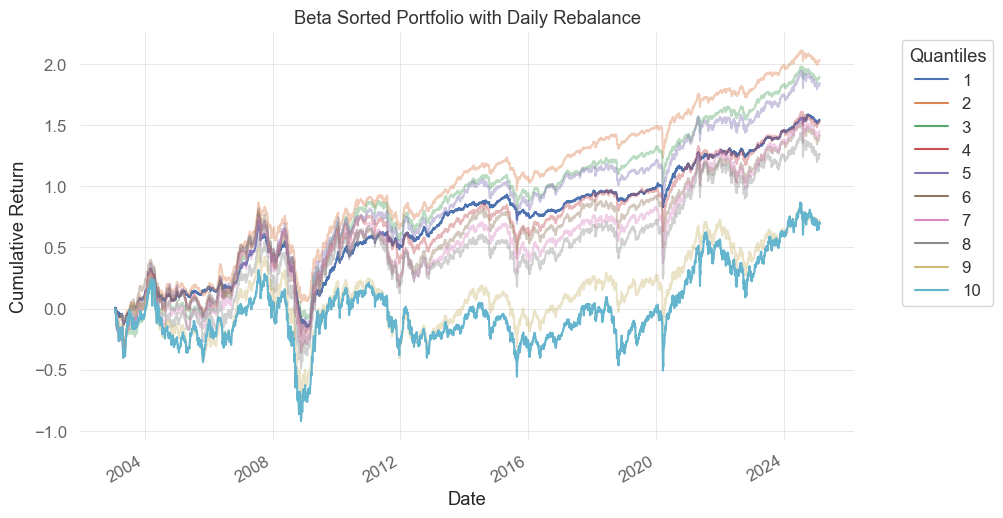

In [195]:
returns_daily_rebalanced, positions = test_factor_performance(stocks, factor = 'beta_lag1', returns = 'logRet_1d', reverse = True)


#returns_daily_rebalanced.cumsum().plot(figsize=(12, 6))
plt.title('Beta Sorted Portfolio with Daily Rebalance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Quantiles', bbox_to_anchor=(1.05, 1), loc='upper left')

# Make other quantiles transparent and highlight 1st and 10th quantiles
for i in range(1, 9):
    plt.gca().get_lines()[i].set_alpha(0.4)

/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_32742/3284360848.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_returns = df.groupby(['Date', 'Quantile'])[returns].mean().unstack()
/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_32742/3284360848.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Weight'] = 1 / df.groupby(['Date', 'Quantile']).transform('size')
/Users/stuartlu/anaconda3/envs/ml-taiwan-stockpicks/lib/python3.12/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ret

                    1           2           3           4           5           6           7           8           9           10
------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start Period        2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06
End Period          2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12
Risk-Free Rate      0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%
Time in Market      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%

Cumulative Return   401.28%     572.17%     572.85%     256.92%     247.98%     227.08%     159.38%     82.96%      19.69%      -28.87%
CAGR﹪              5.18%       6.15%       6.16

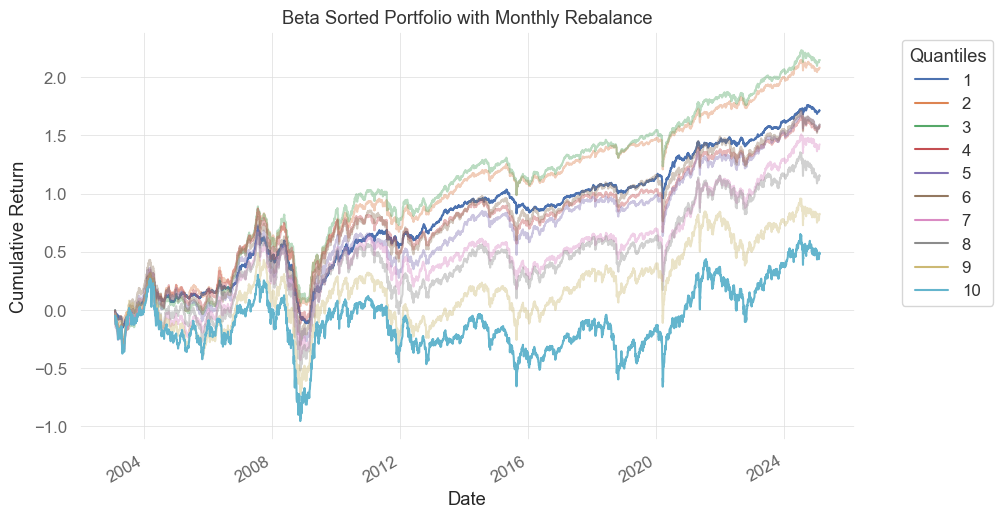

In [198]:
# test monthly quantile returns

stocks = df[df.index.get_level_values('證券代碼') != 'Y9999 加權指數'].dropna(how='any')

stocks['Month'] = stocks.index.get_level_values('Date').to_period('M')
stocks_monthly = stocks.groupby(['證券代碼', 'Month']).last()
stocks_monthly['beta_last_month'] = stocks_monthly.groupby('證券代碼')['beta'].shift(1)
stocks = stocks.merge(stocks_monthly[['beta_last_month']], left_on=['證券代碼', 'Month'], right_index=True).dropna(how='any')

quantile_returns, positions = test_factor_performance(stocks, factor = 'beta_last_month', returns = 'logRet_1d', reverse = True)

#returns_daily_rebalanced.cumsum().plot(figsize=(12, 6))
plt.title('Beta Sorted Portfolio with Monthly Rebalance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Quantiles', bbox_to_anchor=(1.05, 1), loc='upper left')

# Make other quantiles transparent and highlight 1st and 10th quantiles
for i in range(1, 9):
    plt.gca().get_lines()[i].set_alpha(0.4)

In [199]:
stocks['beta_last_month'] 

證券代碼      Date      
1101 台泥   2003-02-06    1.306085
          2003-02-07    1.306085
          2003-02-10    1.306085
          2003-02-11    1.306085
          2003-02-12    1.306085
                          ...   
9958 世紀鋼  2025-02-06    0.719194
          2025-02-07    0.719194
          2025-02-10    0.719194
          2025-02-11    0.719194
          2025-02-12    0.719194
Name: beta_last_month, Length: 3958725, dtype: float64

/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_32742/3284360848.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_returns = df.groupby(['Date', 'Quantile'])[returns].mean().unstack()
/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_32742/3284360848.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Weight'] = 1 / df.groupby(['Date', 'Quantile']).transform('size')
/Users/stuartlu/anaconda3/envs/ml-taiwan-stockpicks/lib/python3.12/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ret

                    1           2           3           4           5           6           7           8           9           10
------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start Period        2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06  2003-02-06
End Period          2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12  2025-02-12
Risk-Free Rate      0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%        0.0%
Time in Market      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%      100.0%

Cumulative Return   401.28%     572.17%     572.85%     256.92%     247.98%     227.08%     159.38%     82.96%      19.69%      -28.87%
CAGR﹪              5.18%       6.15%       6.16

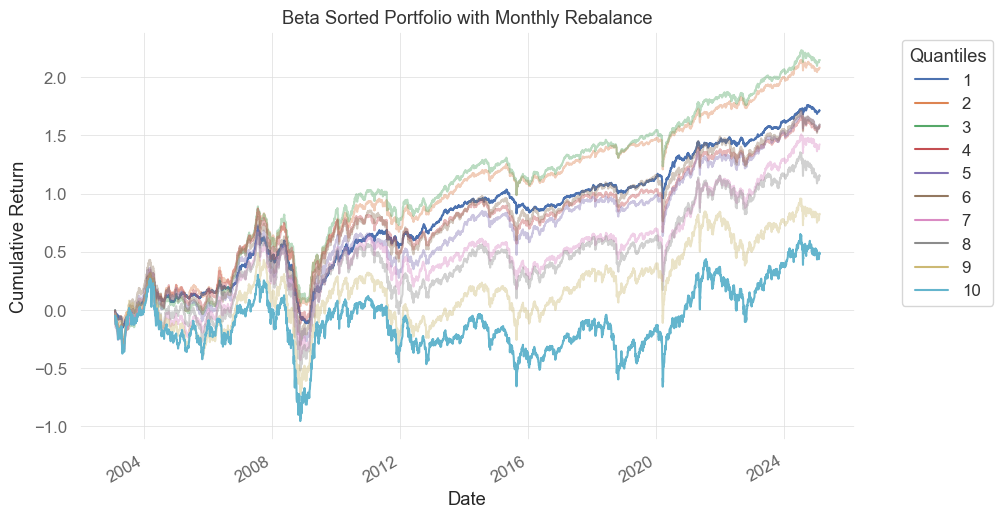

In [200]:
quantile_returns, positions = test_factor_performance(stocks, factor = 'beta_last_month', returns = 'logRet_1d', reverse = True)

#returns_daily_rebalanced.cumsum().plot(figsize=(12, 6))
plt.title('Beta Sorted Portfolio with Monthly Rebalance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Quantiles', bbox_to_anchor=(1.05, 1), loc='upper left')

# Make other quantiles transparent and highlight 1st and 10th quantiles
for i in range(1, 9):
    plt.gca().get_lines()[i].set_alpha(0.4)

In [201]:
# view positions for each quantile

def show_position_at_given_time(position, quantile, date):
    pos = positions[positions.index.get_level_values('Date') == date][positions[quantile] > 0][quantile].index.get_level_values('證券代碼')
    print(f'Quantile {quantile} size: {len(pos)}')
    return pos
    
show_position_at_given_time(positions, 3, '2003-12-22')

/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_32742/1553479281.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos = positions[positions.index.get_level_values('Date') == date][positions[quantile] > 0][quantile].index.get_level_values('證券代碼')


Quantile 3 size: 46


Index(['1215 卜蜂', '1217 愛之味', '1227 佳格', '1324 地球', '1432 大魯閣', '1439 雋揚',
       '1445 大宇', '1454 台富', '1463 強盛新', '1465 偉全', '1503 士電', '1514 亞力',
       '1521 大億', '1522 堤維西', '1526 日馳', '1527 鑽全', '1529 樂事綠能', '1531 高林股',
       '1538 正峰', '1608 華榮', '1612 宏泰', '1618 合機', '2013 中鋼構', '2027 大成鋼',
       '2031 新光鋼', '2033 佳大', '2034 允強', '2105 正新', '2106 建大', '2204 中華',
       '2207 和泰車', '2537 聯上發', '2615 萬海', '2704 國賓', '2820 華票', '2901 欣欣',
       '2911 麗嬰房', '3045 台灣大', '4306 炎洲', '5521 工信', '6141 柏承', '6191 精成科',
       '9905 大華', '9910 豐泰', '9917 中保科', '9928 中視'],
      dtype='object', name='證券代碼')

In [202]:
positions

1    2    3    4    5    6    7         8    9   \
證券代碼     Date                                                           
1101 台泥  2003-02-06  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
         2003-02-07  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
         2003-02-10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
         2003-02-11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
         2003-02-12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
...                  ...  ...  ...  ...  ...  ...  ...       ...  ...   
9958 世紀鋼 2025-02-06  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.010417  0.0   
         2025-02-07  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.010417  0.0   
         2025-02-10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.010417  0.0   
         2025-02-11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.010417  0.0   
         2025-02-12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.010417  0.0   

                           10  
證券代碼     Date                  
1101 台泥  2003-02-06  0.023256  
         2003-02-07  0.023256  
         2003-02-10  0.023256  
         2003-02-11  0.023256  
         2003-02-12  0.023256  
...                       ...  
9958 世紀鋼 2025-02-06  0.000000  
         2025-02-07  0.000000  
         2025-02-10  0.000000  
         2025-02-11  0.000000  
         2025-02-12  0.000000  

[3958725 rows x 10 columns]

/Users/stuartlu/anaconda3/envs/ml-taiwan-stockpicks/lib/python3.12/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = _utils._prepare_returns(returns, rf).resample(resolution).sum()


                    high        low         bab
------------------  ----------  ----------  ----------
Start Period        2003-01-27  2003-01-27  2003-01-27
End Period          2025-02-12  2025-02-12  2025-02-12
Risk-Free Rate      0.0%        0.0%        0.0%
Time in Market      100.0%      100.0%      100.0%

Cumulative Return   -10.43%     3,669.18%   6,676.22%
CAGR﹪              -0.34%      12.03%      14.1%

Sharpe              0.15        0.62        1.07
Prob. Sharpe Ratio  75.87%      99.69%      100.0%
Sortino             0.2         0.78        1.43
Sortino/√2          0.14        0.55        1.01
Omega               1.03        1.03        1.03

Max Drawdown        -88.22%     -97.18%     -78.43%
Longest DD Days     6412        4437        1871

Gain/Pain Ratio     0.03        0.13        0.24
Gain/Pain (1M)      0.12        0.46        0.8

Payoff Ratio        0.62        0.7         0.85
Profit Factor       1.03        1.13        1.24
Common Sense Ratio  0.82        0.99

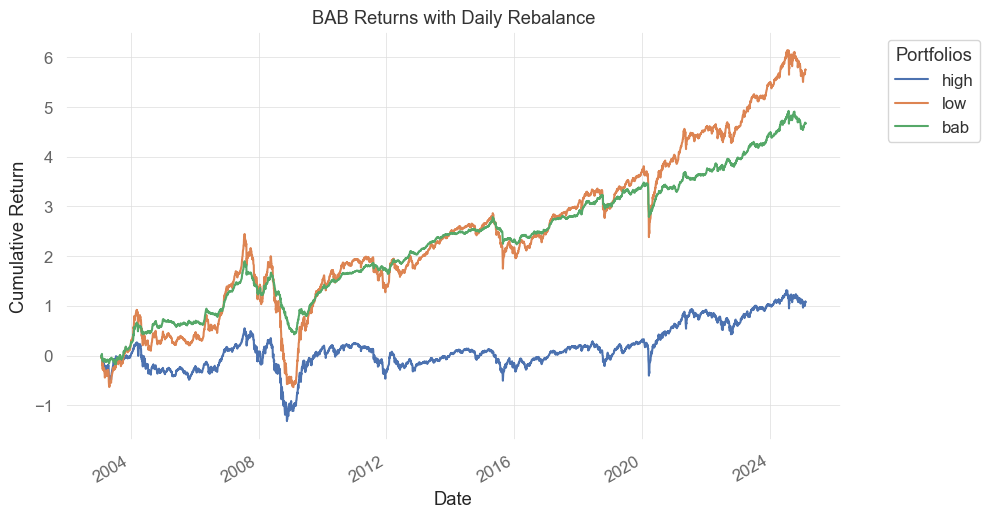

In [203]:
# now we calculate the BAB factor

stocks = df[df.index.get_level_values('證券代碼') != 'TWII'].dropna(how='any')
stocks['Month'] = stocks.index.get_level_values('Date').to_period('M')

stocks['beta_shrinked'] = stocks['beta'] * 0.6
stocks['beta_rank'] = stocks.groupby('Date')['beta_shrinked'].rank(ascending=True)

# assign high/low beta groups
stocks['beta_rank_avg'] = stocks.groupby('Date')['beta_rank'].transform('mean')

stocks['beta_rank_dev'] = stocks['beta_rank'] - stocks['beta_rank_avg']
stocks['beta_rank_abs_dev'] = stocks['beta_rank_dev'].abs()
stocks['k'] = 2 / stocks.groupby('Date')['beta_rank_abs_dev'].transform('sum')
stocks['w_h'] = np.maximum(stocks['beta_rank_dev'], 0) * stocks['k']
stocks['w_l'] = -np.minimum(stocks['beta_rank_dev'], 0) * stocks['k']
stocks['ret_h'] = stocks['w_h'].shift(1) * stocks['logRet_1d']
stocks['ret_l'] = stocks['w_l'].shift(1) * stocks['logRet_1d']
stocks['beta_h'] = stocks['w_h'].shift(1) * stocks['beta_shrinked'].shift(1)
stocks['beta_l'] = stocks['w_l'].shift(1) * stocks['beta_shrinked'].shift(1)

bab_return = pd.DataFrame()
bab_return['high'] = stocks.groupby('Date')['ret_h'].sum() / stocks.groupby('Date')['beta_h'].sum()
bab_return['low'] = stocks.groupby('Date')['ret_l'].sum() / stocks.groupby('Date')['beta_l'].sum()
bab_return['bab'] = bab_return['low'] - bab_return['high']

bab_return
bab_return.cumsum().plot()

qs.reports.metrics(bab_return)

plt.title('BAB Returns with Daily Rebalance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Portfolios', bbox_to_anchor=(1.05, 1), loc='upper left')

In [204]:
# rebalance monthly

stocks_monthly = stocks.groupby(['證券代碼', 'Month']).last()
stocks_monthly['w_h_m'] = stocks_monthly['w_h'].shift(1)
stocks_monthly['w_l_m'] = stocks_monthly['w_l'].shift(1)
stocks_monthly['beta_h_m'] = stocks_monthly['w_h_m'] * stocks_monthly['beta_shrinked'].shift(1)
stocks_monthly['beta_l_m'] = stocks_monthly['w_l_m'] * stocks_monthly['beta_shrinked'].shift(1)

stocks = stocks.merge(stocks_monthly[['w_h_m', 'w_l_m', 'beta_h_m', 'beta_l_m']], left_on=['證券代碼', 'Month'], right_index=True)

stocks['ret_h_m'] = stocks['w_h_m'] * stocks['logRet_1d']
stocks['ret_l_m'] = stocks['w_l_m'] * stocks['logRet_1d']

/Users/stuartlu/anaconda3/envs/ml-taiwan-stockpicks/lib/python3.12/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = _utils._prepare_returns(returns, rf).resample(resolution).sum()


                    high        low         bab
------------------  ----------  ----------  ----------
Start Period        2003-01-27  2003-01-27  2003-01-27
End Period          2025-02-12  2025-02-12  2025-02-12
Risk-Free Rate      0.0%        0.0%        0.0%
Time in Market      100.0%      100.0%      100.0%

Cumulative Return   -23.50%     3,969.21%   9,463.83%
CAGR﹪              -0.83%      12.3%       15.34%

Sharpe              0.13        0.62        1.08
Prob. Sharpe Ratio  72.12%      99.7%       100.0%
Sortino             0.16        0.79        1.43
Sortino/√2          0.12        0.56        1.01
Omega               1.02        1.02        1.02

Max Drawdown        -88.39%     -96.96%     -75.73%
Longest DD Days     6412        4362        1470

Gain/Pain Ratio     0.02        0.14        0.26
Gain/Pain (1M)      0.09        0.48        0.93

Payoff Ratio        0.61        0.69        0.83
Profit Factor       1.02        1.14        1.26
Common Sense Ratio  0.8         1.

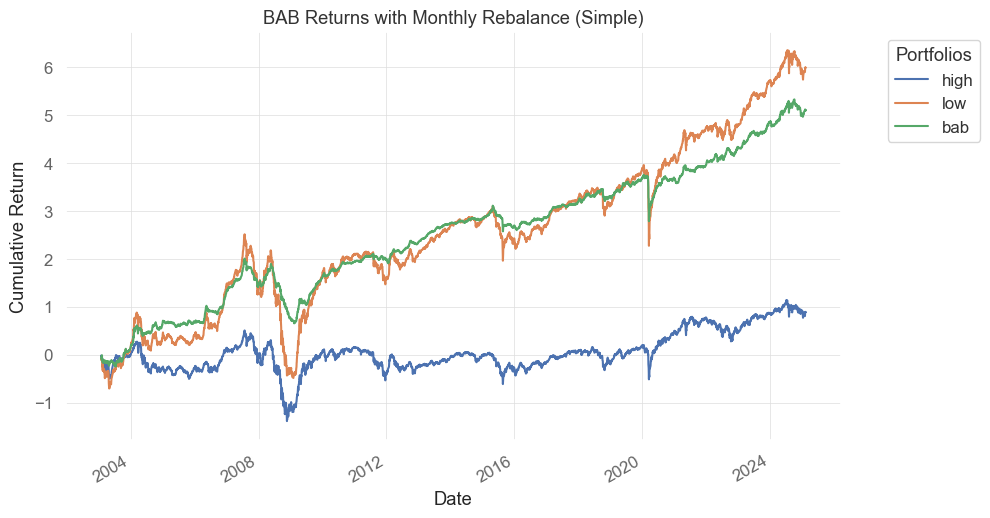

In [205]:
bab_return = pd.DataFrame()
bab_return['high'] = stocks.groupby('Date')['ret_h_m'].sum() / stocks.groupby('Date')['beta_h_m'].sum()
bab_return['low'] = stocks.groupby('Date')['ret_l_m'].sum() / stocks.groupby('Date')['beta_l_m'].sum()
bab_return['bab'] = bab_return['low'] - bab_return['high']

bab_return.cumsum().plot()

plt.title('BAB Returns with Monthly Rebalance (Simple)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Portfolios', bbox_to_anchor=(1.05, 1), loc='upper left')

qs.reports.metrics(bab_return)

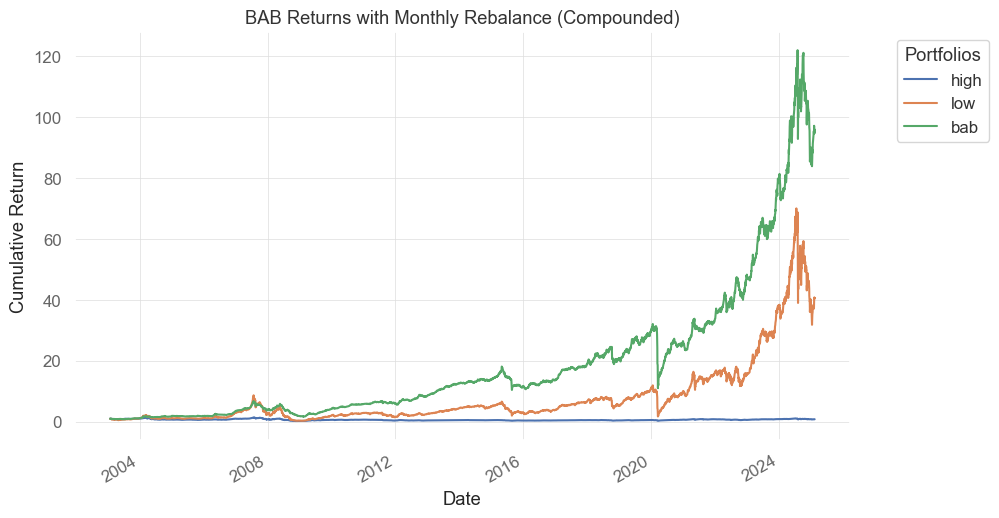

In [206]:
(bab_return + 1).cumprod().plot()

plt.title('BAB Returns with Monthly Rebalance (Compounded)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend(title='Portfolios', bbox_to_anchor=(1.05, 1), loc='upper left')